# Wine Quality

***The goal is to model wine quality based on physiochemical tests***

Import libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import sklearn as sk

In [4]:
wine_df = pd.read_csv('winequality-red.csv',sep=';')

In [5]:
wine_df.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [6]:
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [7]:
# no categorical features, all discrete

In [8]:
wine_df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


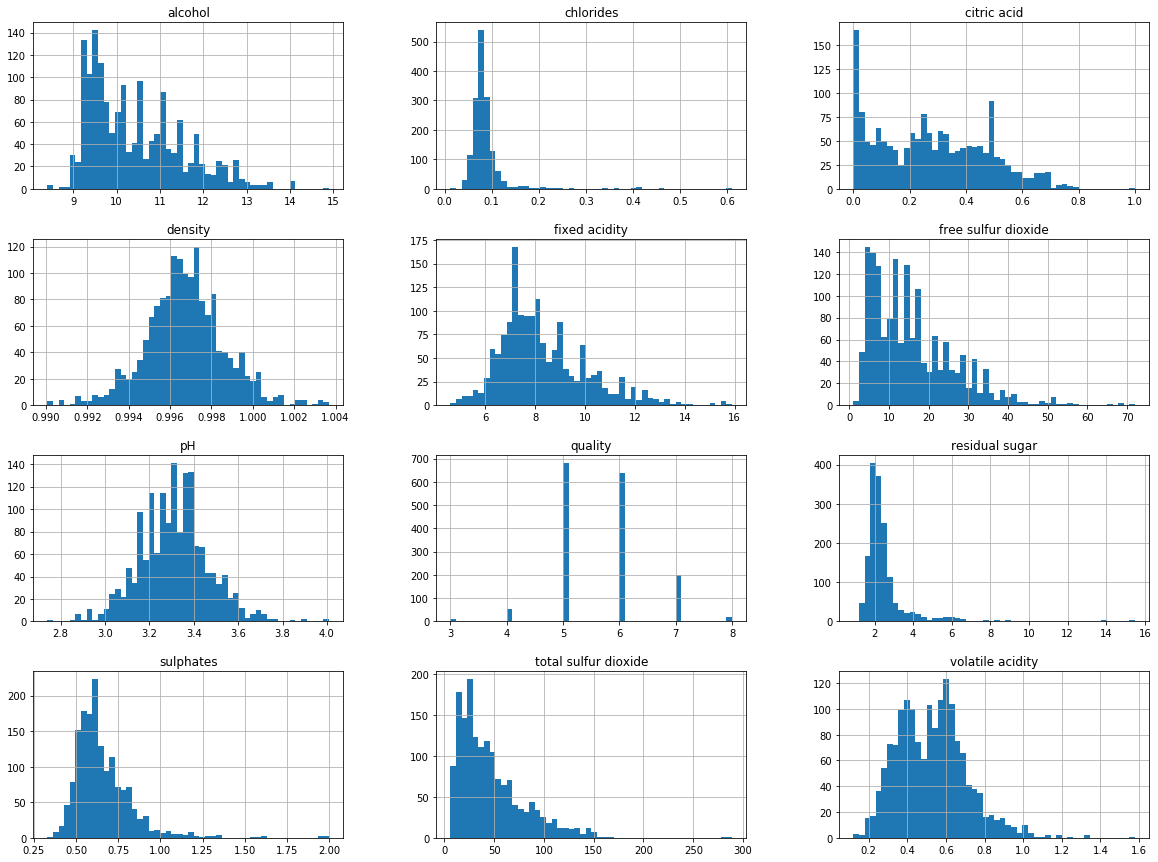

In [9]:
wine_df.hist(bins=50,figsize=(20,15))
plt.show()

In [10]:
# density and pH seem to be normally distributed, actually most features seem to be normally distributed which is good i guess..
# note, all normal distributions obey 68-95-99.7 rule i.e. 68% fall in -1 to +1 sd..95% fall in -2 to +2 and 99.7% fall in
# -3 to +3 sd of mean


In [11]:
# initial observations:
# our attributes have different scaling, so feature scaling is likely needed
# tho most seem normally distributed which will be beneficial when modelling, some features seem front heavy, having
# a larger distribution to the left of the median..which may make it a bit harder for our ML algorithm to detect patterns
# so we may need to transform these features to have more bell-shaped characteristics

Before moving any further, it is important to create a test set to avoid data snooping bias

In [12]:
# shuffle your dataset
shuffle_wine_df = wine_df.sample(frac=1)

#define a size for train set
train_size = int(0.8*len(wine_df))  

# split your dataset
train_set = shuffle_wine_df[:train_size]
test_set = shuffle_wine_df[train_size:]

In [13]:
len(wine_df)

1599

In [14]:
train_set

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
995,7.7,0.600,0.06,2.0,0.079,19.0,41.0,0.99697,3.39,0.62,10.1,6
239,8.2,1.000,0.09,2.3,0.065,7.0,37.0,0.99685,3.32,0.55,9.0,6
1162,8.5,0.320,0.42,2.3,0.075,12.0,19.0,0.99434,3.14,0.71,11.8,7
1234,7.1,0.750,0.01,2.2,0.059,11.0,18.0,0.99242,3.39,0.40,12.8,6
1011,8.9,0.320,0.31,2.0,0.088,12.0,19.0,0.99570,3.17,0.55,10.4,6
...,...,...,...,...,...,...,...,...,...,...,...,...
615,9.6,0.600,0.50,2.3,0.079,28.0,71.0,0.99970,3.50,0.57,9.7,5
808,7.4,0.530,0.12,1.9,0.165,4.0,12.0,0.99702,3.26,0.86,9.2,5
526,7.3,0.365,0.49,2.5,0.088,39.0,106.0,0.99660,3.36,0.78,11.0,5
700,10.6,1.020,0.43,2.9,0.076,26.0,88.0,0.99840,3.08,0.57,10.1,6


In [15]:
test_set

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1326,6.7,0.460,0.24,1.7,0.077,18.0,34.0,0.99480,3.39,0.60,10.6,6
1571,6.4,0.380,0.14,2.2,0.038,15.0,25.0,0.99514,3.44,0.65,11.1,6
1031,7.3,0.550,0.01,1.8,0.093,9.0,15.0,0.99514,3.35,0.58,11.0,7
367,10.4,0.575,0.61,2.6,0.076,11.0,24.0,1.00000,3.16,0.69,9.0,5
223,8.6,0.645,0.25,2.0,0.083,8.0,28.0,0.99815,3.28,0.60,10.0,6
...,...,...,...,...,...,...,...,...,...,...,...,...
833,11.6,0.470,0.44,1.6,0.147,36.0,51.0,0.99836,3.38,0.86,9.9,4
1053,8.3,0.330,0.42,2.3,0.070,9.0,20.0,0.99426,3.38,0.77,12.7,7
89,7.0,0.620,0.08,1.8,0.076,8.0,24.0,0.99780,3.48,0.53,9.0,5
603,13.2,0.460,0.52,2.2,0.071,12.0,35.0,1.00060,3.10,0.56,9.0,6


In [16]:
# now createa a copy of your train set so we dont harm it
wine_train = train_set.copy()

In [17]:
wine_train.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [18]:
# check correlation between target variable and features
wine_corr_mat = wine_train.corr()

In [19]:
correlation_score = wine_corr_mat['quality'].sort_values(ascending=False)

In [20]:
correlation_score

quality                 1.000000
alcohol                 0.472638
sulphates               0.249283
citric acid             0.214130
fixed acidity           0.113295
residual sugar          0.027740
free sulfur dioxide    -0.016223
pH                     -0.039607
chlorides              -0.142581
total sulfur dioxide   -0.166379
density                -0.172599
volatile acidity       -0.374482
Name: quality, dtype: float64

In [21]:
# interesting.. as alcohol, sulphates, citric acid, fixed acid and residual sugar goes up quality goes up too
# as pH, free sulfur dioxide, chlorides, density, total sulfar dioxide and volatile acidity go up, quality drops

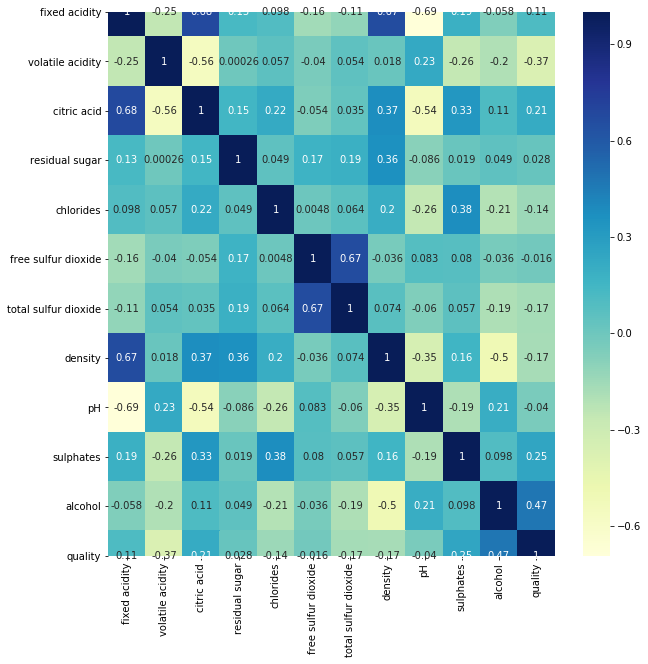

In [22]:
plt.figure(figsize=(10,10))
sns.heatmap(wine_corr_mat,cmap='YlGnBu',annot=True)

In [53]:
# i was hoping to see if any features were heavily correlated to avoid multicolinearity but seems like that is not the case

In [58]:
# lets have a visual of the relationships between features

In [23]:
columns = wine_train.columns
columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

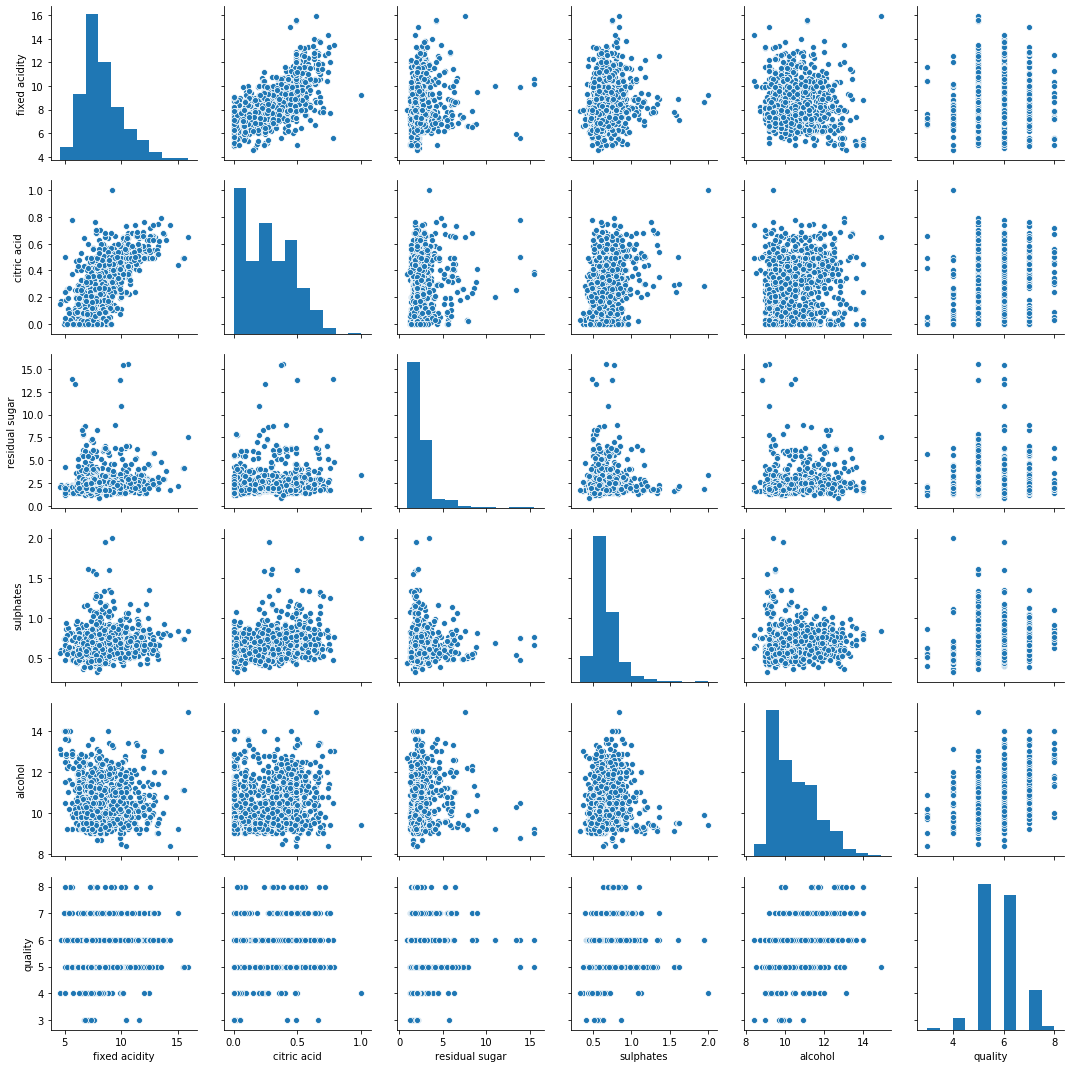

In [24]:
pairplot1 = sns.pairplot(wine_train,vars=['fixed acidity', 'citric acid', 'residual sugar',
       'sulphates', 'alcohol', 'quality'])
pairplot1

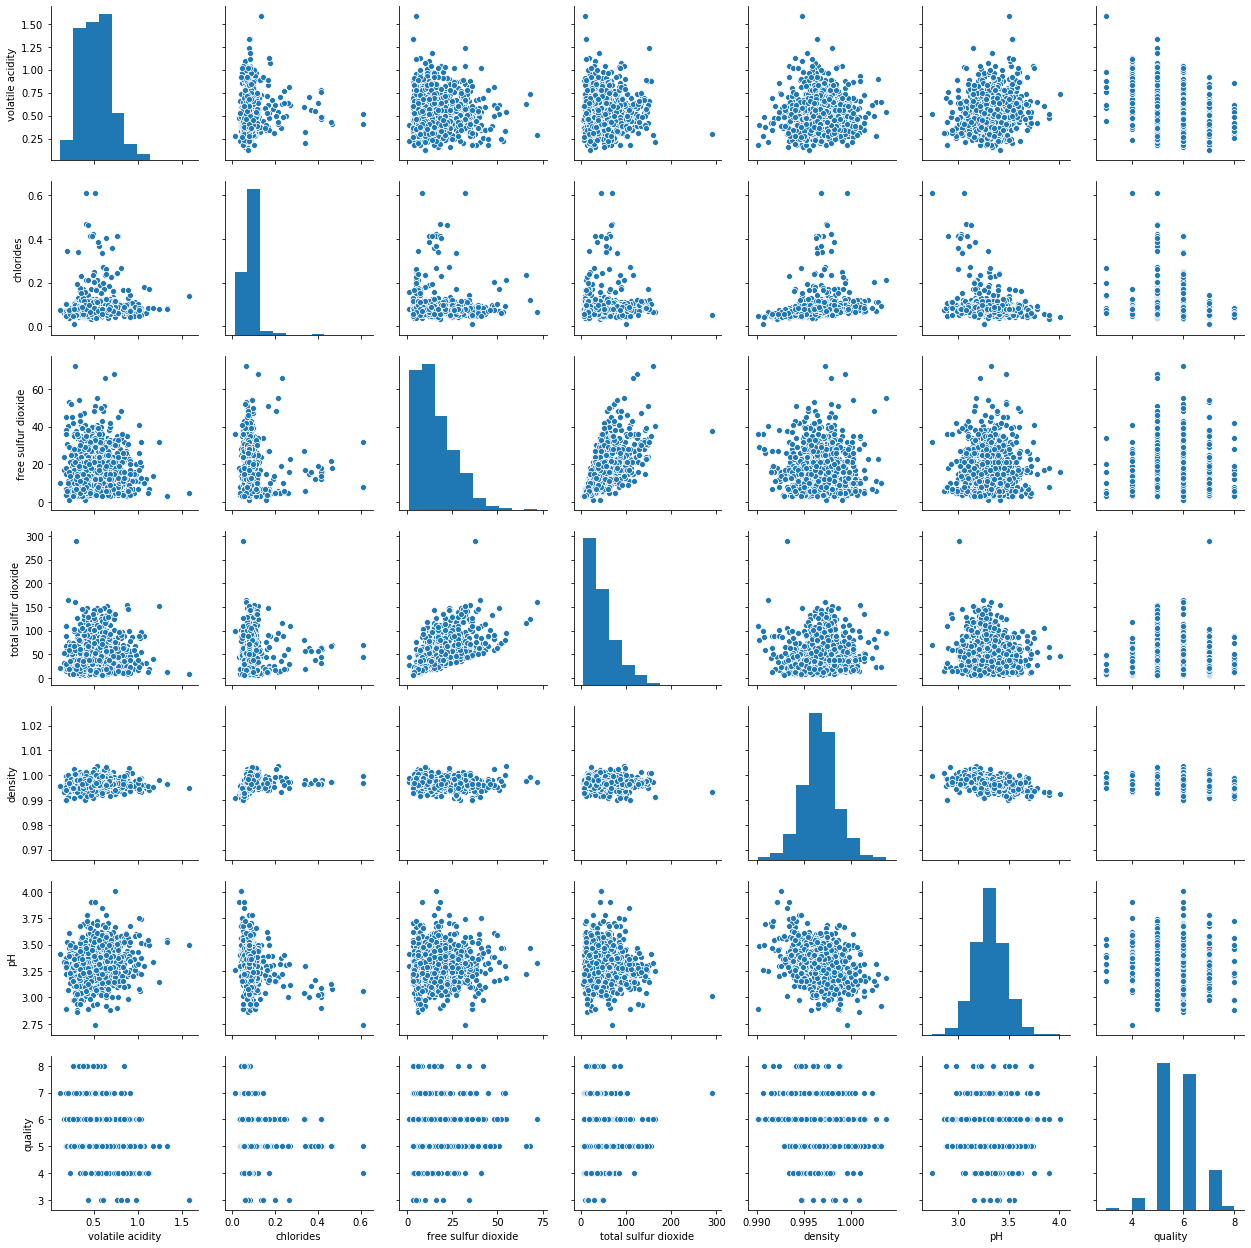

In [25]:
pairplot2 = sns.pairplot(wine_train,vars=['volatile acidity', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'quality'])
pairplot2

In [26]:
columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

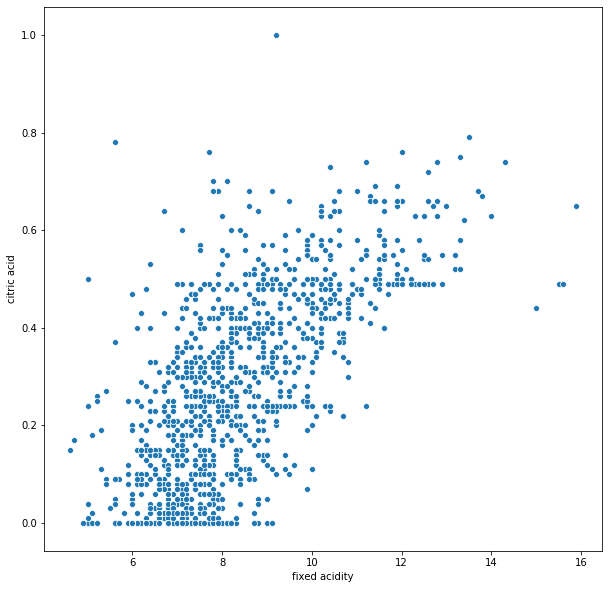

In [27]:
# just checking relationship b/w fixed acidity and citric acid
plt.figure(figsize=(10,10))
sns.scatterplot(x='fixed acidity',y='citric acid',data=wine_train,palette='YlGnBu')

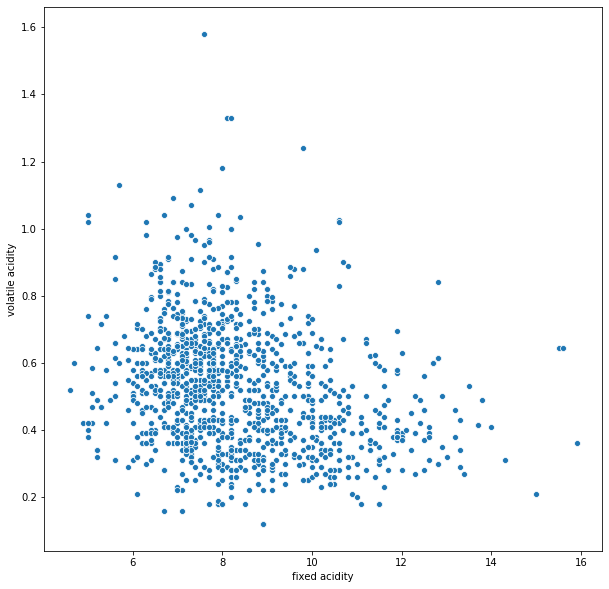

In [28]:
# just checking relationship b/w fixed acidity and volatile acidity
plt.figure(figsize=(10,10))
sns.scatterplot(x='fixed acidity',y='volatile acidity',data=wine_train,palette='YlGnBu')

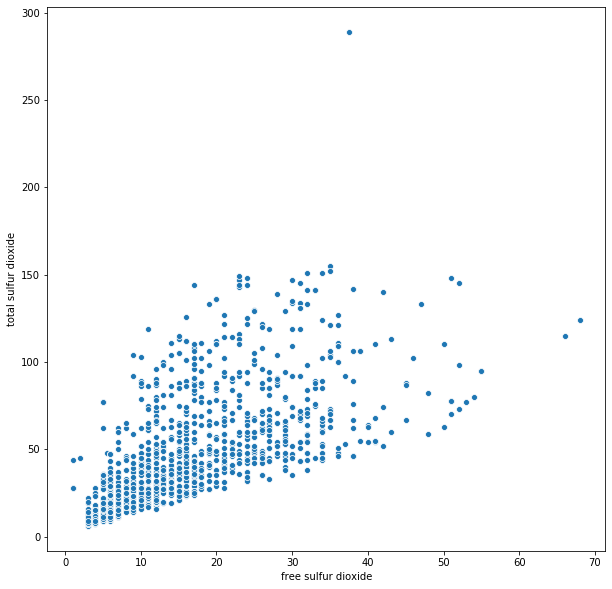

In [25]:
# just checking relationship b/w free sulphur dioxide and total sulphur dioxide
plt.figure(figsize=(10,10))
sns.scatterplot(x='free sulfur dioxide',y='total sulfur dioxide',data=wine_train,palette='YlGnBu')

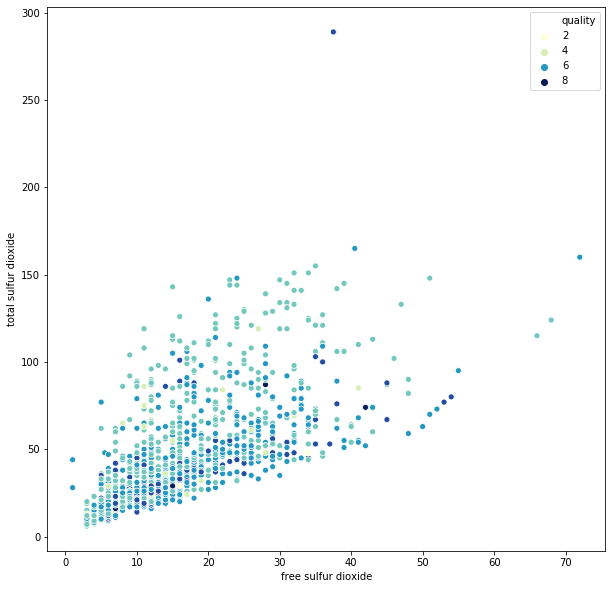

In [29]:
# clearly a very distinct relationship i.e. as one increases so does the other, lets see how they correspond:
# need to drop one
plt.figure(figsize=(10,10))
sns.scatterplot(x='free sulfur dioxide',y='total sulfur dioxide',data=wine_train,palette='YlGnBu',hue='quality')

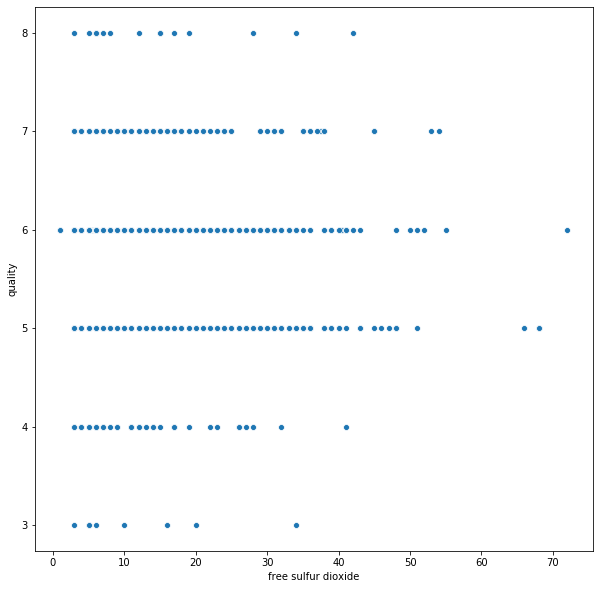

In [30]:
plt.figure(figsize=(10,10))
sns.scatterplot(x='free sulfur dioxide',y='quality',data=wine_train,palette='YlGnBu')

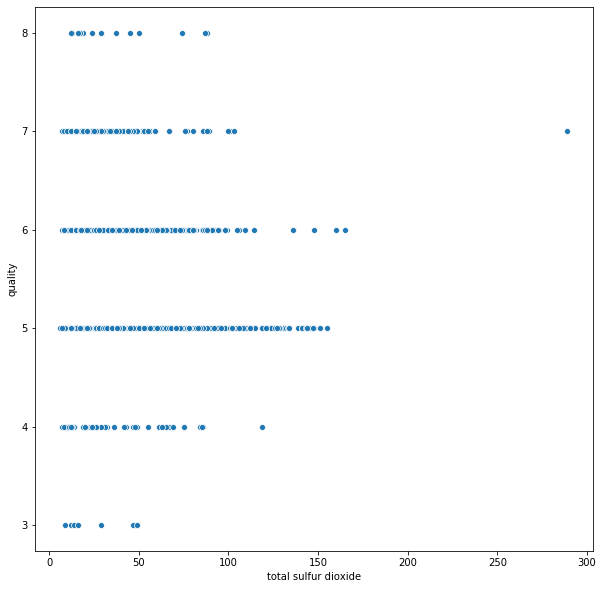

In [31]:
plt.figure(figsize=(10,10))
sns.scatterplot(x='total sulfur dioxide',y='quality',data=wine_train,palette='YlGnBu')

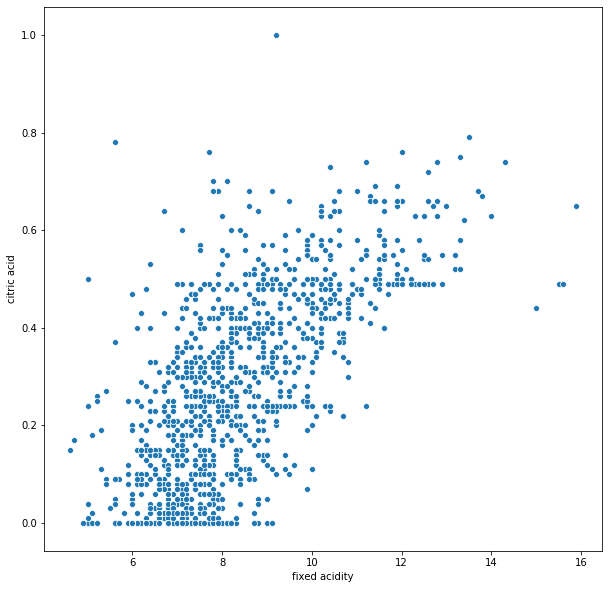

In [32]:
plt.figure(figsize=(10,10))
sns.scatterplot(x='fixed acidity',y='citric acid',data=wine_train,palette='YlGnBu')

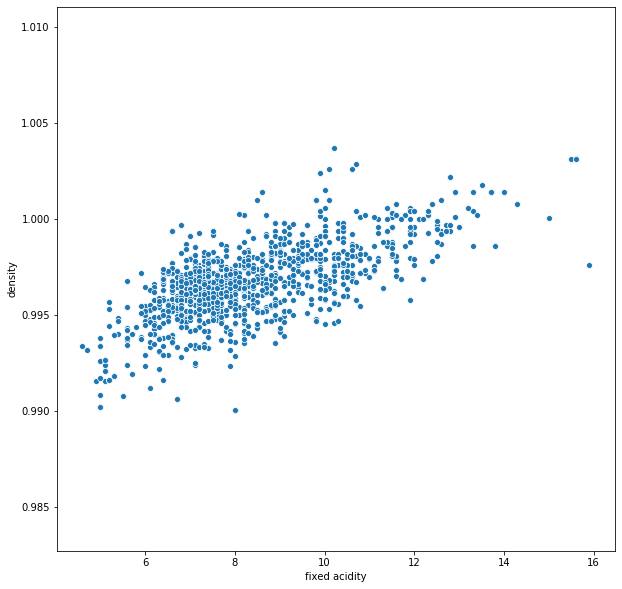

In [33]:
plt.figure(figsize=(10,10))
sns.scatterplot(x='fixed acidity',y='density',data=wine_train,palette='YlGnBu')

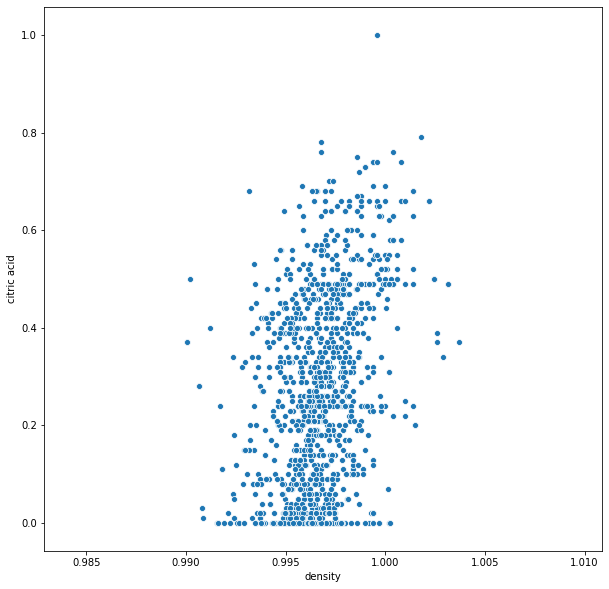

In [34]:
plt.figure(figsize=(10,10))
sns.scatterplot(x='density',y='citric acid',data=wine_train,palette='YlGnBu')

In [35]:
wine_train

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
995,7.7,0.600,0.06,2.0,0.079,19.0,41.0,0.99697,3.39,0.62,10.1,6
239,8.2,1.000,0.09,2.3,0.065,7.0,37.0,0.99685,3.32,0.55,9.0,6
1162,8.5,0.320,0.42,2.3,0.075,12.0,19.0,0.99434,3.14,0.71,11.8,7
1234,7.1,0.750,0.01,2.2,0.059,11.0,18.0,0.99242,3.39,0.40,12.8,6
1011,8.9,0.320,0.31,2.0,0.088,12.0,19.0,0.99570,3.17,0.55,10.4,6
...,...,...,...,...,...,...,...,...,...,...,...,...
615,9.6,0.600,0.50,2.3,0.079,28.0,71.0,0.99970,3.50,0.57,9.7,5
808,7.4,0.530,0.12,1.9,0.165,4.0,12.0,0.99702,3.26,0.86,9.2,5
526,7.3,0.365,0.49,2.5,0.088,39.0,106.0,0.99660,3.36,0.78,11.0,5
700,10.6,1.020,0.43,2.9,0.076,26.0,88.0,0.99840,3.08,0.57,10.1,6


In [36]:
wine2df = pd.read_csv('winequality-red.csv',sep=';')
wine2df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [37]:
# had loads of trouble trying to drop the free sulfur dioxide and fixed acidity columns as one would drop and the other
# would remain in the other cell
# decided to paste code below and drop both in the same cell..

#might want to drop free sulfur dioxide based on the fact that it has more noise i.e. more outliers and more scatter
wine_train.drop(['free sulfur dioxide','fixed acidity'],axis=1,inplace=True)
wine_train

# dropping fixed acidity based on the fact that its well correlated with both density and citric acid
# all educated guesses
#wine_df.drop('fixed acidity',axis=1,inplace=True)
# accidentally dropped fixed acidity from org df, now go down to bottom to see dropped from train_set

,volatile acidity,citric acid,residual sugar,chlorides,total sulfur dioxide,density,pH,sulphates,alcohol,quality
995,0.600,0.06,2.0,0.079,41.0,0.99697,3.39,0.62,10.1,6
239,1.000,0.09,2.3,0.065,37.0,0.99685,3.32,0.55,9.0,6
1162,0.320,0.42,2.3,0.075,19.0,0.99434,3.14,0.71,11.8,7
1234,0.750,0.01,2.2,0.059,18.0,0.99242,3.39,0.40,12.8,6
1011,0.320,0.31,2.0,0.088,19.0,0.99570,3.17,0.55,10.4,6
...,...,...,...,...,...,...,...,...,...,...
615,0.600,0.50,2.3,0.079,71.0,0.99970,3.50,0.57,9.7,5
808,0.530,0.12,1.9,0.165,12.0,0.99702,3.26,0.86,9.2,5
526,0.365,0.49,2.5,0.088,106.0,0.99660,3.36,0.78,11.0,5
700,1.020,0.43,2.9,0.076,88.0,0.99840,3.08,0.57,10.1,6


In [38]:
wine_train # quick check, yes finally additional features dropped

,volatile acidity,citric acid,residual sugar,chlorides,total sulfur dioxide,density,pH,sulphates,alcohol,quality
995,0.600,0.06,2.0,0.079,41.0,0.99697,3.39,0.62,10.1,6
239,1.000,0.09,2.3,0.065,37.0,0.99685,3.32,0.55,9.0,6
1162,0.320,0.42,2.3,0.075,19.0,0.99434,3.14,0.71,11.8,7
1234,0.750,0.01,2.2,0.059,18.0,0.99242,3.39,0.40,12.8,6
1011,0.320,0.31,2.0,0.088,19.0,0.99570,3.17,0.55,10.4,6
...,...,...,...,...,...,...,...,...,...,...
615,0.600,0.50,2.3,0.079,71.0,0.99970,3.50,0.57,9.7,5
808,0.530,0.12,1.9,0.165,12.0,0.99702,3.26,0.86,9.2,5
526,0.365,0.49,2.5,0.088,106.0,0.99660,3.36,0.78,11.0,5
700,1.020,0.43,2.9,0.076,88.0,0.99840,3.08,0.57,10.1,6


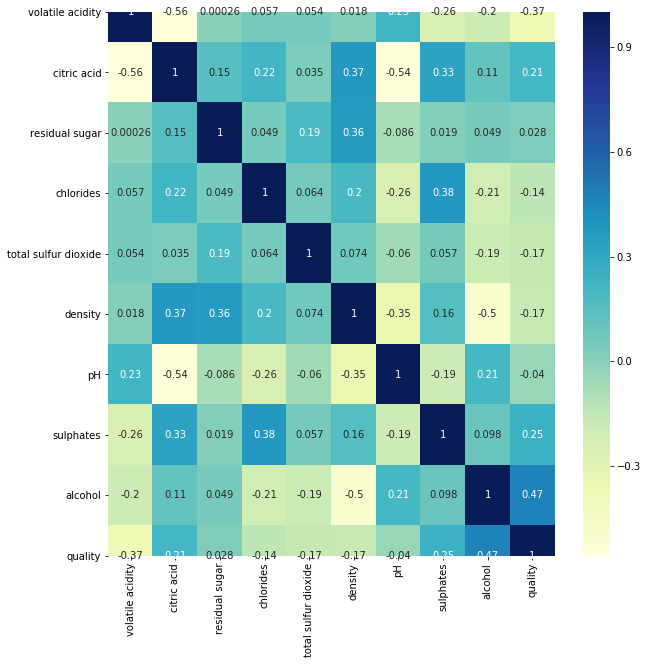

In [39]:
b = wine_train.corr()
plt.figure(figsize=(10,10))
sns.heatmap(b,annot=True,cmap='YlGnBu')

#okay now our unwanted features are no longer part of our heatmap

In [1]:
# now lets do some feature scaling cos our units arent uniform
# primarily 2 ways of scaling i.e. min/max scaling and normalisation
# min/max also referred to as standardisation
# opted to use standardisation here as its less affected by outliers

In [70]:
# see now where the mean is higher than the actual value, we are getting a negative so probably best to normalise instead
# so its deleted now, but initially i used standardisation and cos the mean was higher than certain values, it gave
# -ve values so im opting for normalisation instead

In [40]:
unscaled_values = wine_train[['alcohol','total sulfur dioxide']]
unscaled_values

,alcohol,total sulfur dioxide
995,10.1,41.0
239,9.0,37.0
1162,11.8,19.0
1234,12.8,18.0
1011,10.4,19.0
...,...,...
615,9.7,71.0
808,9.2,12.0
526,11.0,106.0
700,10.1,88.0


In [41]:
from sklearn import preprocessing
min_max_scalar = preprocessing.MinMaxScaler()
scaled_values = min_max_scalar.fit_transform(unscaled_values)
scaled_values
scaled_values=pd.DataFrame(scaled_values,columns=['alcohol','total sulfur dioxide'],index=unscaled_values.index)
scaled_values

,alcohol,total sulfur dioxide
995,0.261538,0.123675
239,0.092308,0.109541
1162,0.523077,0.045936
1234,0.676923,0.042403
1011,0.307692,0.045936
...,...,...
615,0.200000,0.229682
808,0.123077,0.021201
526,0.400000,0.353357
700,0.261538,0.289753


In [42]:
unscaled_values.min()

alcohol                 8.4
total sulfur dioxide    6.0
dtype: float64

In [43]:
unscaled_values.max()

alcohol                  14.9
total sulfur dioxide    289.0
dtype: float64

In [44]:
wine_train.drop(['alcohol','total sulfur dioxide'],axis=1,inplace=True)
wine_train

,volatile acidity,citric acid,residual sugar,chlorides,density,pH,sulphates,quality
995,0.600,0.06,2.0,0.079,0.99697,3.39,0.62,6
239,1.000,0.09,2.3,0.065,0.99685,3.32,0.55,6
1162,0.320,0.42,2.3,0.075,0.99434,3.14,0.71,7
1234,0.750,0.01,2.2,0.059,0.99242,3.39,0.40,6
1011,0.320,0.31,2.0,0.088,0.99570,3.17,0.55,6
...,...,...,...,...,...,...,...,...
615,0.600,0.50,2.3,0.079,0.99970,3.50,0.57,5
808,0.530,0.12,1.9,0.165,0.99702,3.26,0.86,5
526,0.365,0.49,2.5,0.088,0.99660,3.36,0.78,5
700,1.020,0.43,2.9,0.076,0.99840,3.08,0.57,6


In [45]:
wine_trainv1 = wine_train.copy()
wine_trainv1

,volatile acidity,citric acid,residual sugar,chlorides,density,pH,sulphates,quality
995,0.600,0.06,2.0,0.079,0.99697,3.39,0.62,6
239,1.000,0.09,2.3,0.065,0.99685,3.32,0.55,6
1162,0.320,0.42,2.3,0.075,0.99434,3.14,0.71,7
1234,0.750,0.01,2.2,0.059,0.99242,3.39,0.40,6
1011,0.320,0.31,2.0,0.088,0.99570,3.17,0.55,6
...,...,...,...,...,...,...,...,...
615,0.600,0.50,2.3,0.079,0.99970,3.50,0.57,5
808,0.530,0.12,1.9,0.165,0.99702,3.26,0.86,5
526,0.365,0.49,2.5,0.088,0.99660,3.36,0.78,5
700,1.020,0.43,2.9,0.076,0.99840,3.08,0.57,6


In [46]:
a = pd.concat([wine_trainv1,scaled_values],axis=1) # was just a check to see if concatenation worked, it worked
a

,volatile acidity,citric acid,residual sugar,chlorides,density,pH,sulphates,quality,alcohol,total sulfur dioxide
995,0.600,0.06,2.0,0.079,0.99697,3.39,0.62,6,0.261538,0.123675
239,1.000,0.09,2.3,0.065,0.99685,3.32,0.55,6,0.092308,0.109541
1162,0.320,0.42,2.3,0.075,0.99434,3.14,0.71,7,0.523077,0.045936
1234,0.750,0.01,2.2,0.059,0.99242,3.39,0.40,6,0.676923,0.042403
1011,0.320,0.31,2.0,0.088,0.99570,3.17,0.55,6,0.307692,0.045936
...,...,...,...,...,...,...,...,...,...,...
615,0.600,0.50,2.3,0.079,0.99970,3.50,0.57,5,0.200000,0.229682
808,0.530,0.12,1.9,0.165,0.99702,3.26,0.86,5,0.123077,0.021201
526,0.365,0.49,2.5,0.088,0.99660,3.36,0.78,5,0.400000,0.353357
700,1.020,0.43,2.9,0.076,0.99840,3.08,0.57,6,0.261538,0.289753


In [47]:
wine_train = pd.concat([wine_train,scaled_values],axis=1) 
wine_train # finally got the train set to a point where both free sulfur and fixed acidity removed and also normalisation
# complete

,volatile acidity,citric acid,residual sugar,chlorides,density,pH,sulphates,quality,alcohol,total sulfur dioxide
995,0.600,0.06,2.0,0.079,0.99697,3.39,0.62,6,0.261538,0.123675
239,1.000,0.09,2.3,0.065,0.99685,3.32,0.55,6,0.092308,0.109541
1162,0.320,0.42,2.3,0.075,0.99434,3.14,0.71,7,0.523077,0.045936
1234,0.750,0.01,2.2,0.059,0.99242,3.39,0.40,6,0.676923,0.042403
1011,0.320,0.31,2.0,0.088,0.99570,3.17,0.55,6,0.307692,0.045936
...,...,...,...,...,...,...,...,...,...,...
615,0.600,0.50,2.3,0.079,0.99970,3.50,0.57,5,0.200000,0.229682
808,0.530,0.12,1.9,0.165,0.99702,3.26,0.86,5,0.123077,0.021201
526,0.365,0.49,2.5,0.088,0.99660,3.36,0.78,5,0.400000,0.353357
700,1.020,0.43,2.9,0.076,0.99840,3.08,0.57,6,0.261538,0.289753


In [48]:
wine_train.quality.value_counts()

5    552
6    509
7    151
4     43
8     16
3      8
Name: quality, dtype: int64

In [49]:
# now define variables before inputting into model
# removed quality so adding it back to wine_df now
#a = wine_trainv1.pop('quality')
#wine_train = wine_train.join(a)
wine_train

,volatile acidity,citric acid,residual sugar,chlorides,density,pH,sulphates,quality,alcohol,total sulfur dioxide
995,0.600,0.06,2.0,0.079,0.99697,3.39,0.62,6,0.261538,0.123675
239,1.000,0.09,2.3,0.065,0.99685,3.32,0.55,6,0.092308,0.109541
1162,0.320,0.42,2.3,0.075,0.99434,3.14,0.71,7,0.523077,0.045936
1234,0.750,0.01,2.2,0.059,0.99242,3.39,0.40,6,0.676923,0.042403
1011,0.320,0.31,2.0,0.088,0.99570,3.17,0.55,6,0.307692,0.045936
...,...,...,...,...,...,...,...,...,...,...
615,0.600,0.50,2.3,0.079,0.99970,3.50,0.57,5,0.200000,0.229682
808,0.530,0.12,1.9,0.165,0.99702,3.26,0.86,5,0.123077,0.021201
526,0.365,0.49,2.5,0.088,0.99660,3.36,0.78,5,0.400000,0.353357
700,1.020,0.43,2.9,0.076,0.99840,3.08,0.57,6,0.261538,0.289753


In [50]:
wine_train.columns

Index(['volatile acidity', 'citric acid', 'residual sugar', 'chlorides',
       'density', 'pH', 'sulphates', 'quality', 'alcohol',
       'total sulfur dioxide'],
      dtype='object')

In [51]:
wine_train = wine_train[['volatile acidity', 'citric acid', 'residual sugar', 'chlorides',
       'density', 'pH', 'sulphates', 'alcohol',
       'total sulfur dioxide','quality']] # just reordering
wine_train

,volatile acidity,citric acid,residual sugar,chlorides,density,pH,sulphates,alcohol,total sulfur dioxide,quality
995,0.600,0.06,2.0,0.079,0.99697,3.39,0.62,0.261538,0.123675,6
239,1.000,0.09,2.3,0.065,0.99685,3.32,0.55,0.092308,0.109541,6
1162,0.320,0.42,2.3,0.075,0.99434,3.14,0.71,0.523077,0.045936,7
1234,0.750,0.01,2.2,0.059,0.99242,3.39,0.40,0.676923,0.042403,6
1011,0.320,0.31,2.0,0.088,0.99570,3.17,0.55,0.307692,0.045936,6
...,...,...,...,...,...,...,...,...,...,...
615,0.600,0.50,2.3,0.079,0.99970,3.50,0.57,0.200000,0.229682,5
808,0.530,0.12,1.9,0.165,0.99702,3.26,0.86,0.123077,0.021201,5
526,0.365,0.49,2.5,0.088,0.99660,3.36,0.78,0.400000,0.353357,5
700,1.020,0.43,2.9,0.076,0.99840,3.08,0.57,0.261538,0.289753,6


In [52]:
X_train = wine_train.iloc[:,:9] # defining variables
y_train = wine_train.iloc[:,-1]

In [53]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [54]:
# now lets see how our predictions did
some_data = X_train.iloc[:5]
some_labels = y_train.iloc[:5]
print('Lin regression predictions:', lin_reg.predict(some_data))
print('Lin regression labels:', list(some_labels))

Lin regression predictions: [5.44365283 4.70204194 6.42539431 5.95789528 5.84607886]
Lin regression labels: [6, 6, 7, 6, 6]


In [112]:
# wow! a lot better than i expected!!!!

In [55]:
# now lets use some metrics to evaluate our model
from sklearn.metrics import mean_squared_error
X_train_predictions = lin_reg.predict(X_train)
lin_mse = mean_squared_error(y_train,X_train_predictions)
lin_rmse = np.sqrt(lin_mse)
print('Root Mean Squared error is:',lin_rmse)

Root Mean Squared error is: 0.6505709408268034


In [115]:
# This seems like a good value but i am worried that my model may be overfitting the training data
# All target values i.e. quality of wine range between 3-8 so a typical prediction error of 0.651
# is good (or at least seems like it is)

In [56]:
# lets check R^2 and adj R^2 score on training set too
from sklearn.metrics import r2_score
print('R squared score is: ',r2_score(y_train,X_train_predictions))

R squared score is:  0.3490604659921752


In [118]:
# interesting, i thought R^2 would be a lot higher, lets check adj r^2

In [57]:
# stack solution
# compute with statsmodels, by adding intercept manually
import statsmodels.api as sm
X1 = sm.add_constant(X_train_predictions)
result = sm.OLS(y_train,X1).fit()
#print dir(result)
print(result.rsquared,result.rsquared_adj)

0.349060465992175 0.3485507247752543


In [58]:
## hmm both seem quite low, initially i thought the model was overfitting but actually seems like
# its not doing a good job fitting our training data
# lets train a DecisionTreeRegressor
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor()
tree_reg.fit(X_train,y_train)

# now that the model is trained, lets evaluate on the training set
X_train_t_predictions = tree_reg.predict(X_train)
tree_mse = mean_squared_error(y_train,X_train_t_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

In [123]:
# RMSE showing as 0, which explains it. IT IS HIGHLY LIKE THE MODEL HAS BADLY OVERFIT THE DATA!!!! 
# Lets not touch the test set till we fix this
# we need to use part of the training set for training and part of it for model validation
# lets explore cross validation

In [59]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree_reg,X_train,y_train,scoring='neg_mean_squared_error',cv=10)
tree_rmse_scores=np.sqrt(-scores) # still a bit confused but from what i understand, sklearns cross-val features
#expect a utility function as opposed to cost function, so the scoring function is actually opposite of MSE i.e. a -ve value
# lets see the results
def display_scores(scores):
    print('Scores:',scores)
    print('Mean:',scores.mean())
    print('Standard deviation:',scores.std())
    
display_scores(tree_rmse)

Scores: 0.0
Mean: 0.0
Standard deviation: 0.0


In [60]:
# not entirely sure why cross validation not working on dataset, lets try using cross validation on linear regression
# and also random forest regressor, one of the stack links said that this may be because you are using a regressor
# for a classification problem
lin_scores = cross_val_score(lin_reg,X_train,y_train,scoring='neg_mean_squared_error',cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [0.65144288 0.65144952 0.76276737 0.60640266 0.6193973  0.62470161
 0.5897503  0.70302537 0.7340722  0.61149805]
Mean: 0.6554507257266889
Standard deviation: 0.05558153618565976


In [61]:
# interesting, our cross validated decision tree is overfitting so badly that it performs worse than our linear regression
# model
# also, interesting to note that our initial model did better than our cross-validated model i.e. our cross validated model
# predicts error of 0.655 as opposed to 0.651, marginal difference but something to note
# lets try randomforestregressor

In [62]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
forest_reg.fit(X_train,y_train)

# now that the model is trained, lets evaluate on the training set
X_train_RF_predictions = forest_reg.predict(X_train)
RF_mse = mean_squared_error(y_train,X_train_RF_predictions)
RF_rmse = np.sqrt(RF_mse)
RF_rmse

C:\Users\cp772eh\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.2602999412628112

In [63]:
# wow substantially lower! seems like overfitting though, lets inspect using cross validation
RF_scores = cross_val_score(forest_reg,X_train,y_train,scoring='neg_mean_squared_error',cv=10)
RF_rmse_scores = np.sqrt(-RF_scores)
display_scores(RF_rmse_scores)

Scores: [0.65257902 0.57425223 0.73058196 0.54464725 0.56312465 0.60246888
 0.55085161 0.65758792 0.72795733 0.57397632]
Mean: 0.6178027177798924
Standard deviation: 0.06672468653761149


In [137]:
# amazing stuff man, random forest definitely outperforms our linear regression model (ever so slightly)
# another important thing to note, the scoring on the training set is much lower than on the validation sets, meaning
# that the model is still overfitting the training set
# to overcome overfitting:
# 1. simplify the model
# 2. contrain it (regularise it)
# 3. or get a lot more training data

# however, first we need to try other models from various categories of ML for eg. several SVM with different kernels and 
# possibly a neural network
# goal is to shortlist a few i.e. 2-5 promising models

In [138]:
# SAVE YOUR MODELS

In [64]:
# you can use pickle operation to serialize your ML algorithms and save the serialized format to a file
# later you can deserialize this model and use it to make predictions
import pickle
with open('lin_reg_model_pickle','wb') as f:
    pickle.dump(lin_reg,f)

In [65]:
with open('lin_reg_model_pickle','rb') as f:
    loaded_lin_reg_model = pickle.load(f)

In [66]:
loaded_lin_reg_model.predict(some_data)

array([5.44365283, 4.70204194, 6.42539431, 5.95789528, 5.84607886])

In [67]:
with open('tree_reg_model_pickle','wb') as t:
    pickle.dump(tree_reg,t)

In [68]:
with open('tree_reg_model_pickle','rb') as t:
    loaded_tree_reg_model = pickle.load(t)

In [69]:
loaded_tree_reg_model.predict(some_data)

array([6., 6., 7., 6., 6.])

In [70]:
some_labels

995     6
239     6
1162    7
1234    6
1011    6
Name: quality, dtype: int64

In [71]:
with open('forest_reg_model_pickle','wb') as rf:
    pickle.dump(forest_reg,rf)

In [72]:
with open('forest_reg_model_pickle','rb') as rf:
    loaded_forest_reg_model = pickle.load(rf)

In [73]:
loaded_forest_reg_model.predict(some_data)

array([5.8, 5.9, 6.9, 6.1, 6. ])

In [158]:
# okay so saved all 3 models but not saved the cross validated scores etc, need to learn this

In [ ]:
# so typically we would experiment with a few other models to see which one is most favourable but for now we have 3
# so lets fine tune these and move on

In [85]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators':[3,10,30],'max_features':[2,4,6,8]},
    {'bootstrap':[False],'n_estimators':[3,10],'max_features':[2,3,4]},
]

In [86]:
grid_search = GridSearchCV(forest_reg,param_grid,cv=5,scoring='neg_mean_squared_error',return_train_score=True)
grid_search.fit(X_train,y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=10, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid=[{'max_features': [2, 4, 6, 8],
    

In [87]:
grid_search.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features=2, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=30,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [88]:
grid_search.best_params_

{'max_features': 2, 'n_estimators': 30}

In [90]:
cvres = grid_search.cv_results_

In [92]:
# need to learn how to obtain these metrics from grid_search but this is good for now, stack solution:
for mean_score, params in zip(cvres['mean_test_score'],cvres['params']):
    print(np.sqrt(-mean_score),params)

0.7044295607044513 {'max_features': 2, 'n_estimators': 3}
0.6143959701457624 {'max_features': 2, 'n_estimators': 10}
0.5918590263862954 {'max_features': 2, 'n_estimators': 30}
0.6912335638591369 {'max_features': 4, 'n_estimators': 3}
0.6160417418307572 {'max_features': 4, 'n_estimators': 10}
0.5935958282344711 {'max_features': 4, 'n_estimators': 30}
0.7026390799387054 {'max_features': 6, 'n_estimators': 3}
0.6266869337242509 {'max_features': 6, 'n_estimators': 10}
0.5985314898992431 {'max_features': 6, 'n_estimators': 30}
0.6861879959397937 {'max_features': 8, 'n_estimators': 3}
0.6157815073043982 {'max_features': 8, 'n_estimators': 10}
0.6046478249925861 {'max_features': 8, 'n_estimators': 30}
0.6742467168763128 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
0.6111103213521879 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
0.6615650514210599 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
0.6151717470287912 {'bootstrap': False, 'max_features': 3, 'n

In [93]:
# We obtained the best solution for our RF model, the mean error is lower than the cross validated score which means
# we have just hypertuned our RF model
# mean error is now 0.591, slight improvement from the initial lin_reg model score

In [94]:
# we can gain further insights on our model by evaluating the features when making predictions in our model
# this can be done using feature importance in gridsearch but lets move on for now

In [96]:
# now lets evaluate our test set
test_set

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1326,6.7,0.460,0.24,1.7,0.077,18.0,34.0,0.99480,3.39,0.60,10.6,6
1571,6.4,0.380,0.14,2.2,0.038,15.0,25.0,0.99514,3.44,0.65,11.1,6
1031,7.3,0.550,0.01,1.8,0.093,9.0,15.0,0.99514,3.35,0.58,11.0,7
367,10.4,0.575,0.61,2.6,0.076,11.0,24.0,1.00000,3.16,0.69,9.0,5
223,8.6,0.645,0.25,2.0,0.083,8.0,28.0,0.99815,3.28,0.60,10.0,6
...,...,...,...,...,...,...,...,...,...,...,...,...
833,11.6,0.470,0.44,1.6,0.147,36.0,51.0,0.99836,3.38,0.86,9.9,4
1053,8.3,0.330,0.42,2.3,0.070,9.0,20.0,0.99426,3.38,0.77,12.7,7
89,7.0,0.620,0.08,1.8,0.076,8.0,24.0,0.99780,3.48,0.53,9.0,5
603,13.2,0.460,0.52,2.2,0.071,12.0,35.0,1.00060,3.10,0.56,9.0,6


In [99]:
# see now if i had used pipeline i could have applied that to our test set, instead i will have to do feature engineering
# again
wine_testset = test_set.copy()

In [100]:
wine_testset.drop(['fixed acidity','free sulfur dioxide'],axis=1,inplace=True)
wine_testset

,volatile acidity,citric acid,residual sugar,chlorides,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1326,0.460,0.24,1.7,0.077,34.0,0.99480,3.39,0.60,10.6,6
1571,0.380,0.14,2.2,0.038,25.0,0.99514,3.44,0.65,11.1,6
1031,0.550,0.01,1.8,0.093,15.0,0.99514,3.35,0.58,11.0,7
367,0.575,0.61,2.6,0.076,24.0,1.00000,3.16,0.69,9.0,5
223,0.645,0.25,2.0,0.083,28.0,0.99815,3.28,0.60,10.0,6
...,...,...,...,...,...,...,...,...,...,...
833,0.470,0.44,1.6,0.147,51.0,0.99836,3.38,0.86,9.9,4
1053,0.330,0.42,2.3,0.070,20.0,0.99426,3.38,0.77,12.7,7
89,0.620,0.08,1.8,0.076,24.0,0.99780,3.48,0.53,9.0,5
603,0.460,0.52,2.2,0.071,35.0,1.00060,3.10,0.56,9.0,6


In [101]:
unscaled_test_values = wine_testset[['alcohol','total sulfur dioxide']]
unscaled_test_values

,alcohol,total sulfur dioxide
1326,10.6,34.0
1571,11.1,25.0
1031,11.0,15.0
367,9.0,24.0
223,10.0,28.0
...,...,...
833,9.9,51.0
1053,12.7,20.0
89,9.0,24.0
603,9.0,35.0


In [102]:
from sklearn import preprocessing
min_max_scalar = preprocessing.MinMaxScaler()
scaled_test_values = min_max_scalar.fit_transform(unscaled_test_values)
scaled_test_values
scaled_test_values=pd.DataFrame(scaled_test_values,columns=['alcohol','total sulfur dioxide'],index=unscaled_test_values.index)
scaled_test_values

,alcohol,total sulfur dioxide
1326,0.355556,0.102941
1571,0.466667,0.069853
1031,0.444444,0.033088
367,0.000000,0.066176
223,0.222222,0.080882
...,...,...
833,0.200000,0.165441
1053,0.822222,0.051471
89,0.000000,0.066176
603,0.000000,0.106618


In [103]:
wine_testset = pd.concat([wine_testset,scaled_test_values],axis=1) 
wine_testset 

,volatile acidity,citric acid,residual sugar,chlorides,total sulfur dioxide,density,pH,sulphates,alcohol,quality,alcohol,total sulfur dioxide
1326,0.460,0.24,1.7,0.077,34.0,0.99480,3.39,0.60,10.6,6,0.355556,0.102941
1571,0.380,0.14,2.2,0.038,25.0,0.99514,3.44,0.65,11.1,6,0.466667,0.069853
1031,0.550,0.01,1.8,0.093,15.0,0.99514,3.35,0.58,11.0,7,0.444444,0.033088
367,0.575,0.61,2.6,0.076,24.0,1.00000,3.16,0.69,9.0,5,0.000000,0.066176
223,0.645,0.25,2.0,0.083,28.0,0.99815,3.28,0.60,10.0,6,0.222222,0.080882
...,...,...,...,...,...,...,...,...,...,...,...,...
833,0.470,0.44,1.6,0.147,51.0,0.99836,3.38,0.86,9.9,4,0.200000,0.165441
1053,0.330,0.42,2.3,0.070,20.0,0.99426,3.38,0.77,12.7,7,0.822222,0.051471
89,0.620,0.08,1.8,0.076,24.0,0.99780,3.48,0.53,9.0,5,0.000000,0.066176
603,0.460,0.52,2.2,0.071,35.0,1.00060,3.10,0.56,9.0,6,0.000000,0.106618


In [104]:
wine_testset

,volatile acidity,citric acid,residual sugar,chlorides,total sulfur dioxide,density,pH,sulphates,alcohol,quality,alcohol,total sulfur dioxide
1326,0.460,0.24,1.7,0.077,34.0,0.99480,3.39,0.60,10.6,6,0.355556,0.102941
1571,0.380,0.14,2.2,0.038,25.0,0.99514,3.44,0.65,11.1,6,0.466667,0.069853
1031,0.550,0.01,1.8,0.093,15.0,0.99514,3.35,0.58,11.0,7,0.444444,0.033088
367,0.575,0.61,2.6,0.076,24.0,1.00000,3.16,0.69,9.0,5,0.000000,0.066176
223,0.645,0.25,2.0,0.083,28.0,0.99815,3.28,0.60,10.0,6,0.222222,0.080882
...,...,...,...,...,...,...,...,...,...,...,...,...
833,0.470,0.44,1.6,0.147,51.0,0.99836,3.38,0.86,9.9,4,0.200000,0.165441
1053,0.330,0.42,2.3,0.070,20.0,0.99426,3.38,0.77,12.7,7,0.822222,0.051471
89,0.620,0.08,1.8,0.076,24.0,0.99780,3.48,0.53,9.0,5,0.000000,0.066176
603,0.460,0.52,2.2,0.071,35.0,1.00060,3.10,0.56,9.0,6,0.000000,0.106618


In [109]:
wine_testset.index

Int64Index([1326, 1571, 1031,  367,  223, 1016,  383, 1482,  375,  148,
            ...
             116,  766,   90,  807,  121,  833, 1053,   89,  603,  554],
           dtype='int64', length=320)

In [110]:
cols = [4,8]
wine_testset.drop(wine_testset.columns[cols],axis=1,inplace=True)
wine_testset

,volatile acidity,citric acid,residual sugar,chlorides,density,pH,sulphates,quality
1326,0.460,0.24,1.7,0.077,0.99480,3.39,0.60,6
1571,0.380,0.14,2.2,0.038,0.99514,3.44,0.65,6
1031,0.550,0.01,1.8,0.093,0.99514,3.35,0.58,7
367,0.575,0.61,2.6,0.076,1.00000,3.16,0.69,5
223,0.645,0.25,2.0,0.083,0.99815,3.28,0.60,6
...,...,...,...,...,...,...,...,...
833,0.470,0.44,1.6,0.147,0.99836,3.38,0.86,4
1053,0.330,0.42,2.3,0.070,0.99426,3.38,0.77,7
89,0.620,0.08,1.8,0.076,0.99780,3.48,0.53,5
603,0.460,0.52,2.2,0.071,1.00060,3.10,0.56,6


In [111]:
scaled_test_values

,alcohol,total sulfur dioxide
1326,0.355556,0.102941
1571,0.466667,0.069853
1031,0.444444,0.033088
367,0.000000,0.066176
223,0.222222,0.080882
...,...,...
833,0.200000,0.165441
1053,0.822222,0.051471
89,0.000000,0.066176
603,0.000000,0.106618


In [112]:
wine_testset = pd.concat([wine_testset,scaled_test_values],axis=1) 
wine_testset 

,volatile acidity,citric acid,residual sugar,chlorides,density,pH,sulphates,quality,alcohol,total sulfur dioxide
1326,0.460,0.24,1.7,0.077,0.99480,3.39,0.60,6,0.355556,0.102941
1571,0.380,0.14,2.2,0.038,0.99514,3.44,0.65,6,0.466667,0.069853
1031,0.550,0.01,1.8,0.093,0.99514,3.35,0.58,7,0.444444,0.033088
367,0.575,0.61,2.6,0.076,1.00000,3.16,0.69,5,0.000000,0.066176
223,0.645,0.25,2.0,0.083,0.99815,3.28,0.60,6,0.222222,0.080882
...,...,...,...,...,...,...,...,...,...,...
833,0.470,0.44,1.6,0.147,0.99836,3.38,0.86,4,0.200000,0.165441
1053,0.330,0.42,2.3,0.070,0.99426,3.38,0.77,7,0.822222,0.051471
89,0.620,0.08,1.8,0.076,0.99780,3.48,0.53,5,0.000000,0.066176
603,0.460,0.52,2.2,0.071,1.00060,3.10,0.56,6,0.000000,0.106618


In [113]:
wine_testset = wine_testset[['volatile acidity', 'citric acid', 'residual sugar', 'chlorides',
       'density', 'pH', 'sulphates', 'alcohol',
       'total sulfur dioxide','quality']]
wine_testset 

,volatile acidity,citric acid,residual sugar,chlorides,density,pH,sulphates,alcohol,total sulfur dioxide,quality
1326,0.460,0.24,1.7,0.077,0.99480,3.39,0.60,0.355556,0.102941,6
1571,0.380,0.14,2.2,0.038,0.99514,3.44,0.65,0.466667,0.069853,6
1031,0.550,0.01,1.8,0.093,0.99514,3.35,0.58,0.444444,0.033088,7
367,0.575,0.61,2.6,0.076,1.00000,3.16,0.69,0.000000,0.066176,5
223,0.645,0.25,2.0,0.083,0.99815,3.28,0.60,0.222222,0.080882,6
...,...,...,...,...,...,...,...,...,...,...
833,0.470,0.44,1.6,0.147,0.99836,3.38,0.86,0.200000,0.165441,4
1053,0.330,0.42,2.3,0.070,0.99426,3.38,0.77,0.822222,0.051471,7
89,0.620,0.08,1.8,0.076,0.99780,3.48,0.53,0.000000,0.066176,5
603,0.460,0.52,2.2,0.071,1.00060,3.10,0.56,0.000000,0.106618,6


In [114]:
# FINALLY got testset to the point i wanted to get to

In [115]:
X_test = wine_testset.iloc[:,:9]
Y_test = wine_testset.iloc[:,-1]

In [116]:
final_model = grid_search.best_estimator_

In [117]:
final_predictions = final_model.predict(X_test)

In [118]:
final_mse = mean_squared_error(Y_test,final_predictions)
final_rmse = np.sqrt(final_mse)

In [119]:
final_rmse

0.5704347757047543

In [120]:
# interesting, our model performs better on the test set with a mean error of 0.570

In [121]:
# save final model
with open('final_model_pickle','wb') as fm:
    pickle.dump(final_model,fm)

In [122]:
with open('final_model_pickle','rb') as fm:
    loaded_final_model = pickle.load(fm)

In [124]:
loaded_final_model.predict(some_data)

array([5.73333333, 5.7       , 6.86666667, 5.96666667, 5.86666667])

In [125]:
# need to analyse dataset using classification too